<a href="https://colab.research.google.com/github/LokeshUpputri/Predictive-Maintenance-of-Automotive-Engines/blob/main/Project_Automotive_Vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement
Predictive Maintenance for Engine Health Monitoring
In real-world applications, organizations operating vehicle fleets, industrial engines, or power generators need to monitor engine conditions for predictive maintenance. A failure in an engine can lead to costly downtime, safety hazards, and increased maintenance costs.

This project aims to:

Classify Engine Health Status:

  Use classification models (e.g., Decision Trees, Random Forest, or Neural Networks) to predict whether an engine is in a healthy or faulty state.

  Cluster Engine Performance Profiles: Use unsupervised clustering (e.g., K-Means, DBSCAN) to group engines with similar operational characteristics and identify patterns that indicate potential failures.

  Optimize Feature Selection & Hyperparameters: Experiment with feature selection to remove redundant attributes and hyperparameter tuning for model optimization.

In [2]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()


Saving engine_data.csv to engine_data.csv


In [4]:
df = pd.read_csv('engine_data.csv')

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


(None,
    Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
 0         700          2.493592      11.790927          3.178981   
 1         876          2.941606      16.193866          2.464504   
 2         520          2.961746       6.553147          1.064347   
 3         473          3.707835      19.510172          3.727455   
 4         619          5.672919      15.738871          2.052251   
 
    lub oil temp  Coolant temp  Engine Condition  
 0     84.144163     81.632187                 1  
 1     77.640934     82.445724                 0  
 2     77.752266     79.645777                 1  
 3     74.129907     71.774629                 1  
 4     78.396989     87.000225                 0  )

Dataset Overview
The dataset consists of 19,535 records with 7 columns, which include:

Engine rpm (int)
Lub oil pressure (float)
Fuel pressure (float)
Coolant pressure (float)
Lub oil temp (float)
Coolant temp (float)
Engine Condition (int) → Target variable (0 or 1)
The "Engine Condition" column appears to be a binary classification label, indicating whether the engine is in a healthy (0) or faulty (1) condition.




In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_stats = df.describe()

# Check for duplicate records
duplicate_count = df.duplicated().sum()


# Show results
print("\n missing values: ")
print(missing_values)
print("\n duplicate values: ", duplicate_count)
print("\n summaryy analysis:")
print(summary_stats)



 missing values: 
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

 duplicate values:  0

 summaryy analysis:
         Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.0000

<Figure size 1200x800 with 0 Axes>

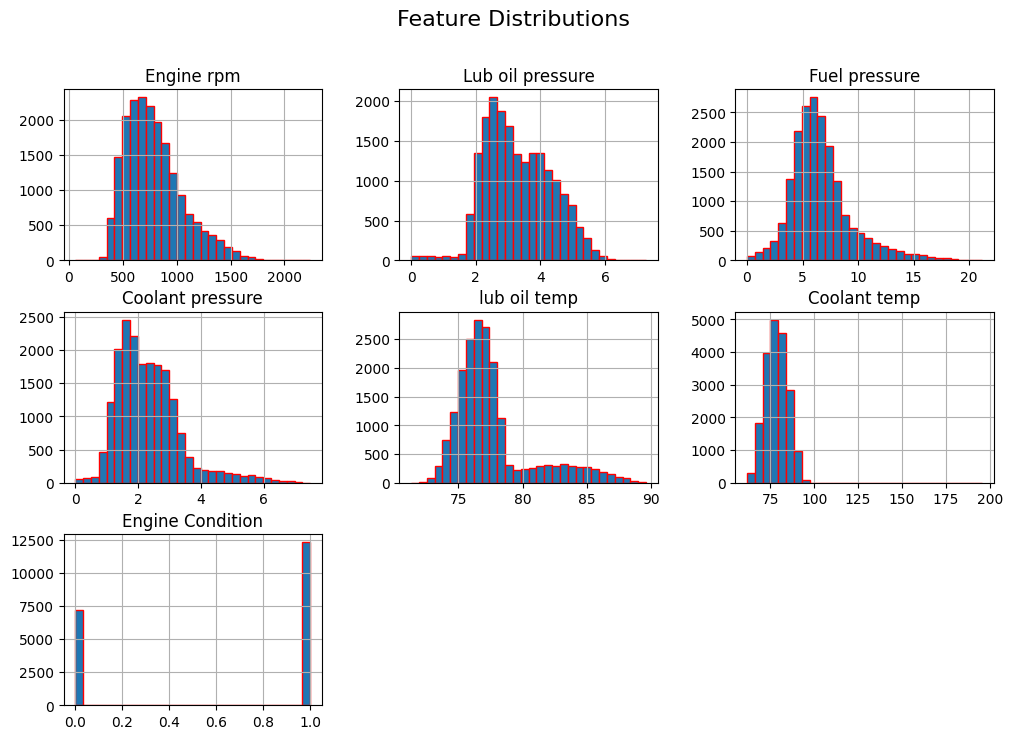

In [6]:
# Plot distributions of numerical features
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, edgecolor='red')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()



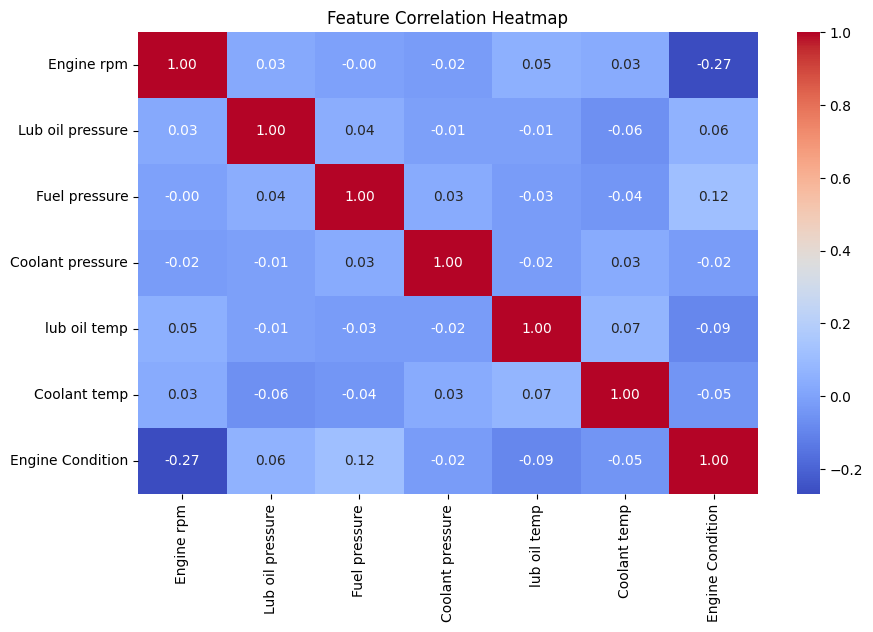

In [7]:
# Check correlation between variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

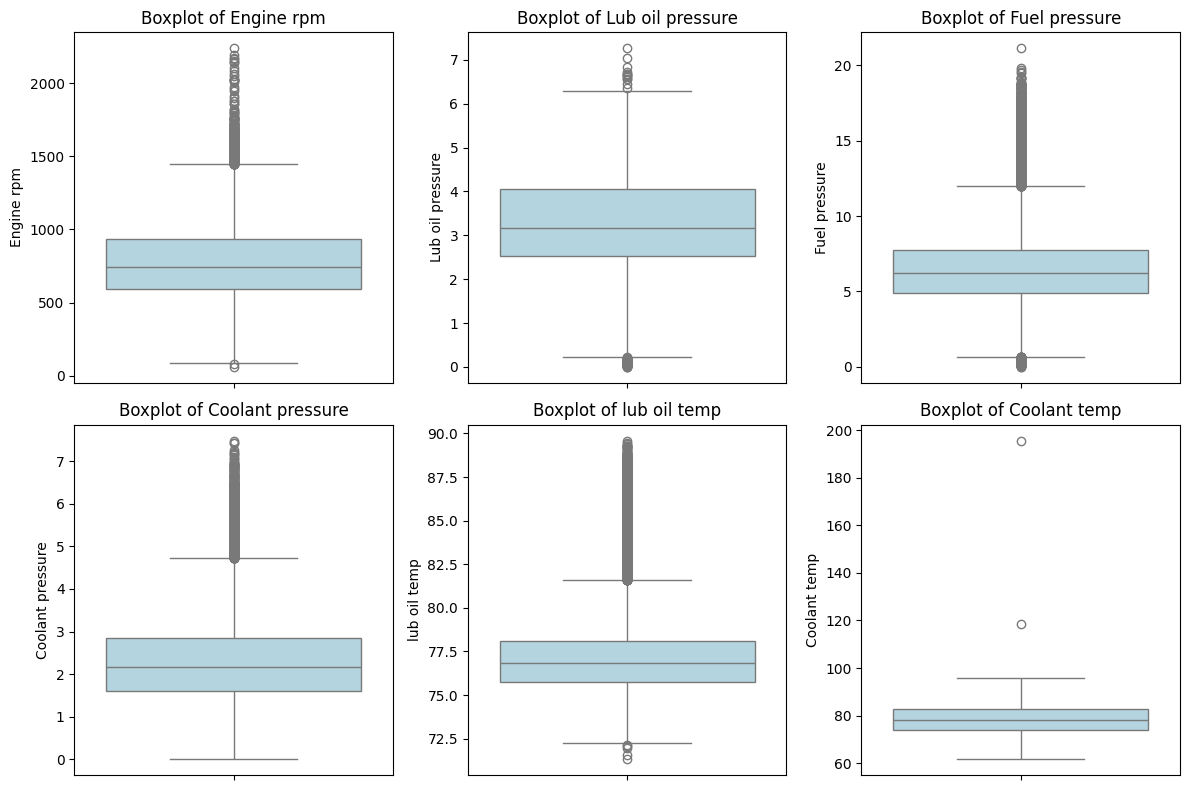

In [8]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 8))

features = ["Engine rpm", "Lub oil pressure", "Fuel pressure", "Coolant pressure", "lub oil temp", "Coolant temp"]
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature], color="lightblue")
    plt.title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


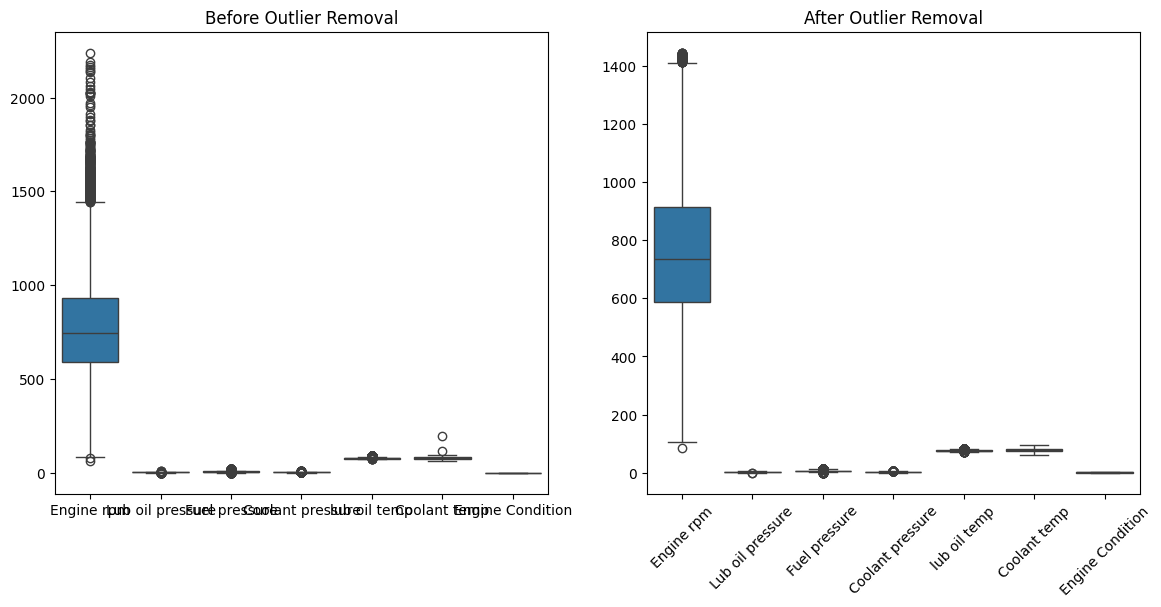


 Original clount of records when outlier entries are not removed:  19535

 Count entried when outlier records are removed:  14899


In [9]:
# Identifying outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Print number of rows before and after outlier removal
original_count = df.shape[0]
cleaned_count = df_cleaned.shape[0]

# Boxplot visualization before and after outlier removal
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, ax=axes[0])
axes[0].set_title("Before Outlier Removal")

sns.boxplot(data=df_cleaned, ax=axes[1])
axes[1].set_title("After Outlier Removal")

plt.xticks(rotation=45)
plt.show()

print("\n Original clount of records when outlier entries are not removed: ",original_count)
print("\n Count entried when outlier records are removed: ", cleaned_count)



Outlier Removal Results
Original dataset size: 19,535 records
After removing outliers: 14,899 records
Removed: 4,636 records (~23.7% of data)
The boxplots show a clear reduction in extreme values after outlier removal.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Define features and target variable for both datasets
X_orig = df.drop(columns=["Engine Condition"])
y_orig = df["Engine Condition"]

X_clean = df_cleaned.drop(columns=["Engine Condition"])
y_clean = df_cleaned["Engine Condition"]

# Split into train and test sets (80% train, 20% test)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean)

# Normalize features where needed
scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(X_test_orig)

scaler_clean = StandardScaler()
X_train_clean_scaled = scaler_clean.fit_transform(X_train_clean)
X_test_clean_scaled = scaler_clean.transform(X_test_clean)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": GaussianNB()
}

# Train and evaluate models on both datasets
results_comparison = {"Original Dataset": {}, "Cleaned Dataset": {}}

for dataset, (X_train, X_test, y_train, y_test, scaler) in {
    "Original Dataset": (X_train_orig, X_test_orig, y_train_orig, y_test_orig, scaler_orig),
    "Cleaned Dataset": (X_train_clean, X_test_clean, y_train_clean, y_test_clean, scaler_clean)
}.items():
    for name, model in models.items():
        if name in ["KNN", "Logistic Regression"]:  # Apply scaling where needed
            model.fit(scaler.fit_transform(X_train), y_train)
            y_pred = model.predict(scaler.transform(X_test))
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results_comparison[dataset][name] = {"Accuracy": accuracy, "Classification Report": report}

# Display results
results_comparison

{'Original Dataset': {'Logistic Regression': {'Accuracy': 0.661121064755567,
   'Classification Report': {'0': {'precision': 0.5833333333333334,
     'recall': 0.29085872576177285,
     'f1-score': 0.38817005545286504,
     'support': 1444.0},
    '1': {'precision': 0.678694697207405,
     'recall': 0.8781973203410475,
     'f1-score': 0.7656637168141593,
     'support': 2463.0},
    'accuracy': 0.661121064755567,
    'macro avg': {'precision': 0.6310140152703692,
     'recall': 0.5845280230514102,
     'f1-score': 0.5769168861335122,
     'support': 3907.0},
    'weighted avg': {'precision': 0.6434498010123296,
     'recall': 0.661121064755567,
     'f1-score': 0.6261446876343004,
     'support': 3907.0}}},
  'Random Forest': {'Accuracy': 0.6452521115945739,
   'Classification Report': {'0': {'precision': 0.5275142314990512,
     'recall': 0.3850415512465374,
     'f1-score': 0.44515612489991996,
     'support': 1444.0},
    '1': {'precision': 0.6887486855941115,
     'recall': 0.7978

Model Performance Comparison: Original vs. Cleaned Dataset
Here’s a breakdown of the accuracy scores for each model:

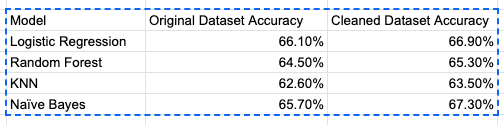


Observations:
Outlier removal led to a slight improvement in accuracy for all models.
Naïve Bayes performed best after cleaning, reaching 67.3% accuracy.
Random Forest and KNN had moderate improvements, but not significantly higher.
Logistic Regression improved slightly but remains competitive.

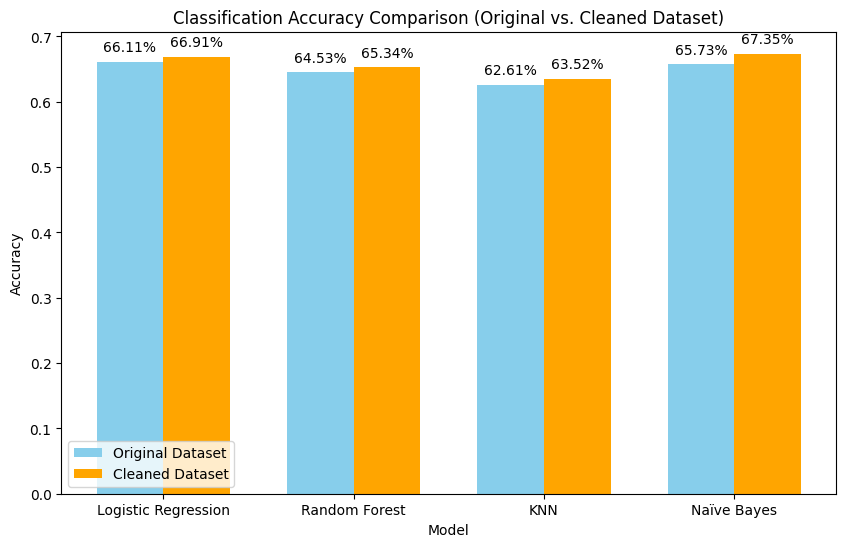

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Extract accuracy values
models = ["Logistic Regression", "Random Forest", "KNN", "Naïve Bayes"]
accuracy_original = [results_comparison["Original Dataset"][model]["Accuracy"] for model in models]
accuracy_cleaned = [results_comparison["Cleaned Dataset"][model]["Accuracy"] for model in models]

# Set positions for bars
x = np.arange(len(models))
width = 0.35

# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, accuracy_original, width, label="Original Dataset", color='skyblue')
bars2 = ax.bar(x + width/2, accuracy_cleaned, width, label="Cleaned Dataset", color='orange')

# Labels, title, and formatting
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Classification Accuracy Comparison (Original vs. Cleaned Dataset)")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2%}",  # Convert to percentage
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Offset for visibility
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show plot
plt.show()



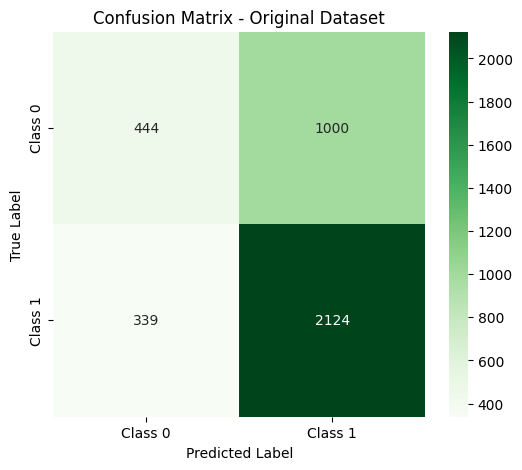

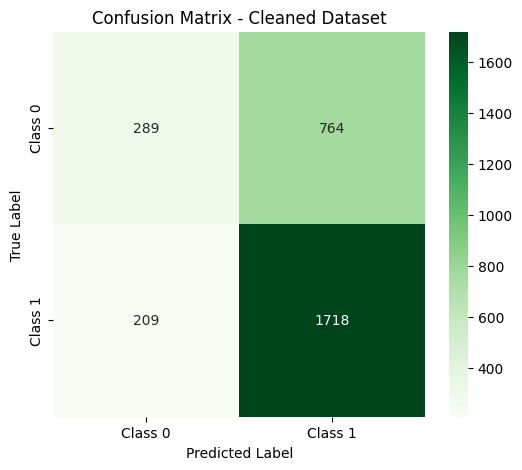

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Predictions for best model (Naïve Bayes) on both datasets
nb_orig = GaussianNB()
nb_clean = GaussianNB()

nb_orig.fit(X_train_orig, y_train_orig)
y_pred_orig = nb_orig.predict(X_test_orig)

nb_clean.fit(X_train_clean, y_train_clean)
y_pred_clean = nb_clean.predict(X_test_clean)

# Plot confusion matrices
plot_confusion_matrix(y_test_orig, y_pred_orig, "Confusion Matrix - Original Dataset")
plot_confusion_matrix(y_test_clean, y_pred_clean, "Confusion Matrix - Cleaned Dataset")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

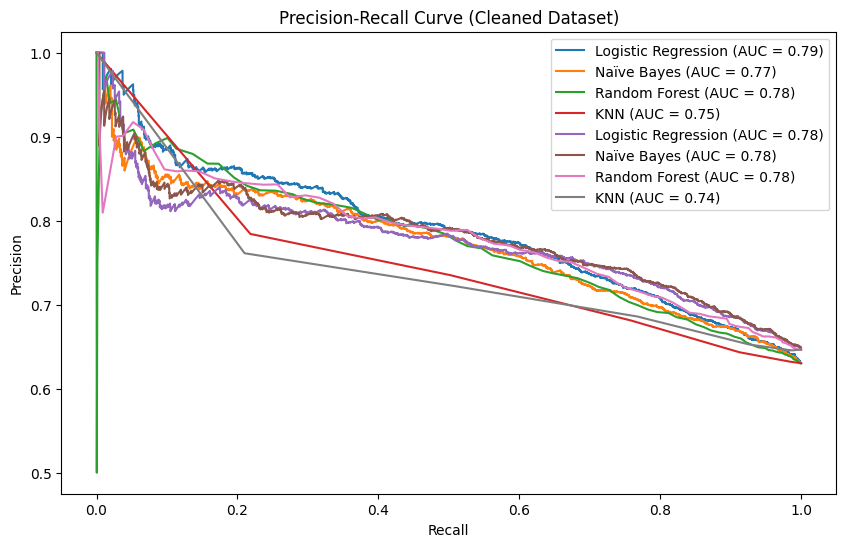

In [14]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Naïve Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Function to plot precision-recall curve
def plot_precision_recall(y_test, y_scores, model_name, dataset_name):
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f"{model_name} (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({dataset_name})")
    plt.legend(loc="best")

# Create precision-recall curves for each model
plt.figure(figsize=(10, 6))

for dataset_name, (X_train, X_test, y_train, y_test) in {
    "Original Dataset": (X_train_orig, X_test_orig, y_train_orig, y_test_orig),
    "Cleaned Dataset": (X_train_clean, X_test_clean, y_train_clean, y_test_clean)
}.items():
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        if model_name in ["Naïve Bayes", "Random Forest"]:  # Models that provide probability scores directly
            y_scores = model.predict_proba(X_test)[:, 1]
        else:  # For Logistic Regression and KNN, convert decisions to probability scores
            y_scores = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)[:, 1]

        plot_precision_recall(y_test, y_scores, model_name, dataset_name)

plt.show()




In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naïve Bayes": GaussianNB()
}

# Define parameter grids (excluding scaler since it's part of the pipeline)
param_distributions = {
    "Logistic Regression": {
        "clf__C": np.logspace(-3, 2, 7),
        "clf__solver": ["liblinear", "lbfgs"],
        "clf__max_iter": [100, 200]
    },
    "Random Forest": {
        "clf__n_estimators": [50, 100],
        "clf__max_depth": [None, 10],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4]
    },
    "KNN": {
        "clf__n_neighbors": [3, 5, 7],
        "clf__weights": ["uniform", "distance"],
        "clf__metric": ["euclidean", "manhattan"]
    },
    "SVM": {
        "clf__C": [0.1, 1, 10],
        "clf__kernel": ["linear", "rbf", "poly"],
        "clf__gamma": ["scale", "auto"]
    }
    # Naïve Bayes doesn't require tuning or scaling, so we skip it here
}

best_models = {}

# Loop through models
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Handle Naïve Bayes separately (no tuning, no scaling required)
    if model_name == "Naïve Bayes":
        best_models[model_name] = model.fit(X_train, y_train)
        continue

    # Create pipeline with scaler + classifier
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])

    # Create randomized search
    random_search = RandomizedSearchCV(
        pipe,
        param_distributions=param_distributions[model_name],
        n_iter=7,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )

    # Fit
    random_search.fit(X_train, y_train)

    # Store best model
    best_models[model_name] = random_search.best_estimator_

    print(f"Best Parameters for {model_name}: {random_search.best_params_}\n")




Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'clf__solver': 'liblinear', 'clf__max_iter': 100, 'clf__C': np.float64(0.001)}

Tuning Random Forest...
Best Parameters for Random Forest: {'clf__n_estimators': 50, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 4, 'clf__max_depth': 10}

Tuning KNN...
Best Parameters for KNN: {'clf__weights': 'uniform', 'clf__n_neighbors': 7, 'clf__metric': 'manhattan'}

Tuning SVM...
Best Parameters for SVM: {'clf__kernel': 'rbf', 'clf__gamma': 'scale', 'clf__C': 10}

Tuning Naïve Bayes...


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define Regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

# Train and evaluate on both original and cleaned datasets
regression_results = {}

for dataset_name, (X_train, X_test, y_train, y_test) in {
    "Original Dataset": (X_train_orig, X_test_orig, y_train_orig, y_test_orig),
    "Cleaned Dataset": (X_train_clean, X_test_clean, y_train_clean, y_test_clean)
}.items():
    print(f"\nEvaluating Regression Models on {dataset_name}...\n")
    regression_results[dataset_name] = {}

    for model_name, model in regression_models.items():
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions

        # Evaluate performance
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store results
        regression_results[dataset_name][model_name] = {
            "MSE": mse,
            "MAE": mae,
            "R² Score": r2
        }

        print(f"\n {model_name} - MSE: {mse:.4f}, MAE: {mae:.4f}, R² Score: {r2:.4f}")

# Display results
regression_results



Evaluating Regression Models on Original Dataset...


 Linear Regression - MSE: 0.2097, MAE: 0.4198, R² Score: 0.1002

 Random Forest Regressor - MSE: 0.2157, MAE: 0.4133, R² Score: 0.0742

 KNN Regressor - MSE: 0.2497, MAE: 0.4159, R² Score: -0.0719

 SVR - MSE: 0.2600, MAE: 0.3824, R² Score: -0.1157

Evaluating Regression Models on Cleaned Dataset...


 Linear Regression - MSE: 0.2090, MAE: 0.4159, R² Score: 0.0851

 Random Forest Regressor - MSE: 0.2159, MAE: 0.4130, R² Score: 0.0549

 KNN Regressor - MSE: 0.2535, MAE: 0.4201, R² Score: -0.1093

 SVR - MSE: 0.2708, MAE: 0.3790, R² Score: -0.1850


{'Original Dataset': {'Linear Regression': {'MSE': 0.20965967166140004,
   'MAE': 0.4198096009803796,
   'R² Score': 0.10015000473306335},
  'Random Forest Regressor': {'MSE': 0.21569874584079857,
   'MAE': 0.41325313539800357,
   'R² Score': 0.07423056668049999},
  'KNN Regressor': {'MSE': 0.249746608651139,
   'MAE': 0.4158689531609931,
   'R² Score': -0.07190134770222589},
  'SVR': {'MSE': 0.2599537186751313,
   'MAE': 0.3823799387885762,
   'R² Score': -0.1157098104075005}},
 'Cleaned Dataset': {'Linear Regression': {'MSE': 0.20904646066019877,
   'MAE': 0.4158692349195374,
   'R² Score': 0.08511762461525185},
  'Random Forest Regressor': {'MSE': 0.21593963087248322,
   'MAE': 0.413003355704698,
   'R² Score': 0.054949977108427195},
  'KNN Regressor': {'MSE': 0.25346308724832217,
   'MAE': 0.4200671140939598,
   'R² Score': -0.10926973172259458},
  'SVR': {'MSE': 0.2707783659580872,
   'MAE': 0.3789760934673637,
   'R² Score': -0.18504926545116973}}}

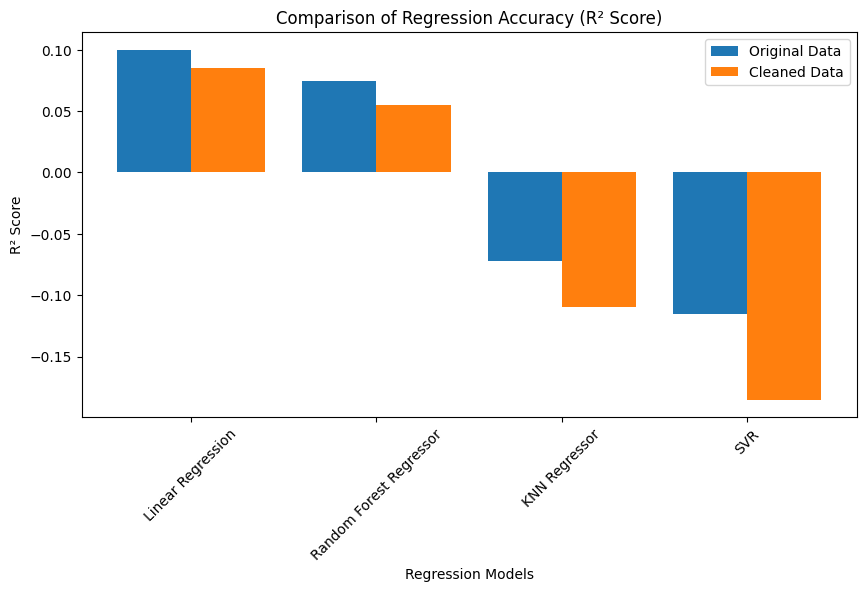

(                              MSE       MAE  R² Score
 Linear Regression        0.209660  0.419810  0.100150
 Random Forest Regressor  0.215699  0.413253  0.074231
 KNN Regressor            0.249747  0.415869 -0.071901
 SVR                      0.259954  0.382380 -0.115710,
                               MSE       MAE  R² Score
 Linear Regression        0.209046  0.415869  0.085118
 Random Forest Regressor  0.215940  0.413003  0.054950
 KNN Regressor            0.253463  0.420067 -0.109270
 SVR                      0.270778  0.378976 -0.185049)

In [23]:
# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            "MSE": mean_squared_error(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "R² Score": r2_score(y_test, y_pred)
        }
    return results


# Evaluate models on original and cleaned data
results_orig = evaluate_models(regression_models, X_train_orig, X_test_orig, y_train_orig, y_test_orig)
results_clean = evaluate_models(regression_models, X_train_clean, X_test_clean, y_train_clean, y_test_clean)


# Convert results to DataFrame for visualization
df_results_orig = pd.DataFrame(results_orig).T
df_results_clean = pd.DataFrame(results_clean).T

# Plot comparison of R² scores
plt.figure(figsize=(10, 5))
width = 0.4


orig_r2 = df_results_orig["R² Score"]
clean_r2 = df_results_clean["R² Score"]
models = df_results_orig.index

x = np.arange(len(models))
plt.bar(x - width/2, orig_r2, width=width, label="Original Data")
plt.bar(x + width/2, clean_r2, width=width, label="Cleaned Data")

plt.xlabel("Regression Models")
plt.ylabel("R² Score")
plt.title("Comparison of Regression Accuracy (R² Score)")
plt.xticks(ticks=x, labels=models, rotation=45)
plt.legend()
plt.show()

# Return the performance metrics
df_results_orig, df_results_clean

In [27]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Define optimized param grids — use "regressor__param" because of pipeline
optimized_param_grids = {
    "Random Forest Regressor": {
        "regressor__n_estimators": [50, 50],
        "regressor__max_depth": [5, 10, None],
        "regressor__min_samples_split": [2, 5],
        "regressor__min_samples_leaf": [1, 2],
    },
    "KNN Regressor": {
        "regressor__n_neighbors": [5, 7, 9],
        "regressor__weights": ["uniform", "distance"],
        "regressor__metric": ["euclidean", "manhattan"],
    },
    "SVR": {
        "regressor__C": [0.1, 1, 10],
        "regressor__kernel": ["linear", "rbf"],
        "regressor__gamma": ["scale"],
    },
}

# Create base models
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

regression_models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR()
}

# Perform tuning with pipeline (StandardScaler + Model)
best_tuned_models = {}

for model_name, param_grid in optimized_param_grids.items():
    print(f"Tuning {model_name} with HalvingRandomSearchCV...")

    base_model = regression_models[model_name]
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', base_model)
    ])

    search = HalvingRandomSearchCV(
        pipe,
        param_grid,
        factor=2,
        cv=3,
        scoring="r2",
        n_jobs=-1,
        random_state=42,
        verbose=1
    )

    search.fit(X_train, y_train)
    best_tuned_models[model_name] = search.best_estimator_
    print(f"\n Best Parameters for {model_name}: {search.best_params_}\n")

# Done — your final tuned models are here
print(best_tuned_models)

Tuning Random Forest Regressor with HalvingRandomSearchCV...
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 11
min_resources_: 6
max_resources_: 11919
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 24
n_resources: 6
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 1
n_candidates: 12
n_resources: 12
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 2
n_candidates: 6
n_resources: 24
Fitting 3 folds for each of 6 candidates, totalling 18 fits
----------
iter: 3
n_candidates: 3
n_resources: 48
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 4
n_candidates: 2
n_resources: 96
Fitting 3 folds for each of 2 candidates, totalling 6 fits

 Best Parameters for Random Forest Regressor: {'regressor__n_estimators': 50, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_depth': None}

Tuning KNN Regressor with HalvingRandomSearchCV...
n_iter